In [4]:
import numpy as np # for storing imaging data as matrices
import matplotlib.pyplot as plt # for basic plotting
import os # to be able to access the file system
import copy # to create deep copies of valuable variables
from sklearn.metrics import f1_score # computing metrics
import nibabel as nib

def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = copy.deepcopy(cmap)
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.6, N+4)
    return mycmap

#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)
mycmap2 = transparent_cmap(plt.cm.Blues)
mycmap3 = transparent_cmap(plt.cm.Greens)



def visualise_predictions (x, y, predictions):

    plt.figure(figsize=(12, 12))

    plt.subplot(np.sqrt(1), np.sqrt(1), 1) #could be done without

    pred = copy.deepcopy(predictions) #actually not needed
    pred[pred != 1] = 0
    
    gt = copy.deepcopy(y) #actually not needed
    gt[y != 1] = 0

    plt.imshow(x, cmap = 'gray') 

    # Adding countours of gt and pred
    plt.contour(gt.reshape(1080,1080), linewidths = 1, cmap=mycmap)
    plt.contour(pred.reshape(1080,1080), linewidths = 1, cmap=mycmap2)
    

    plt.tight_layout()
    plt.axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    return None

<ipython-input-4-cc4659dc9561>:27: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.sqrt(1), np.sqrt(1), 1) #could be done without


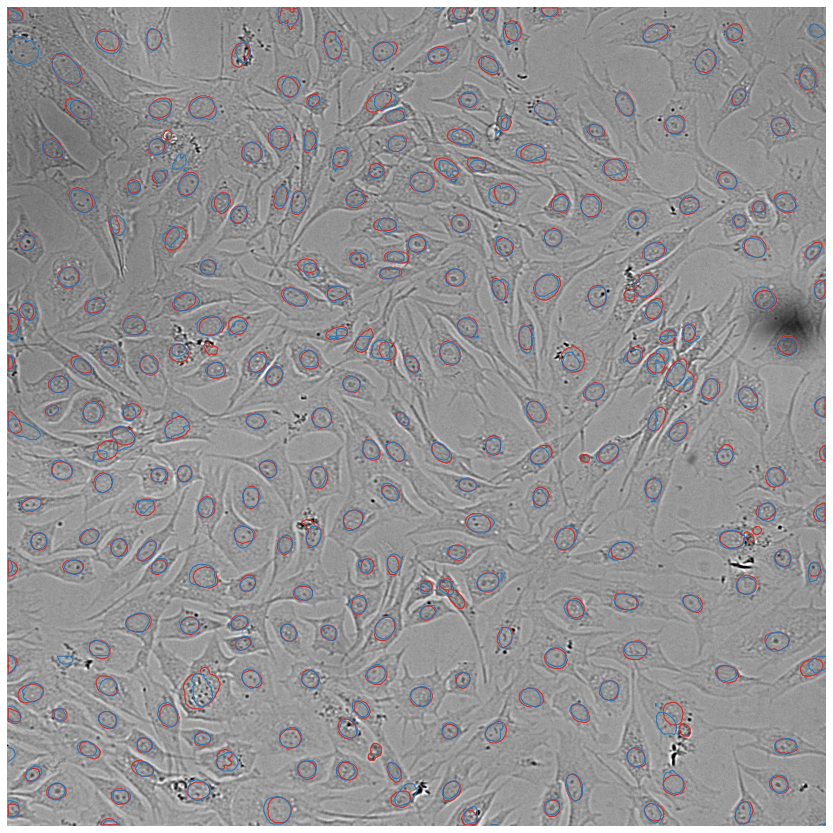

In [5]:
indx = '0'
example_filename =  'test_images_analysis\\image_'+indx+'_pred.nii.gz'
example_filename2 =  'test_images_analysis\\image_'+indx+'_gt.nii.gz'
example_filename4 =  'test_images_analysis\\image_'+indx+'_img.nii.gz'



img = nib.load(example_filename)
img2 = nib.load(example_filename2)
img4 = nib.load(example_filename4)

visualise_predictions (img4.dataobj[:,:,:], img2.dataobj[:,:,:], img.dataobj[:,:,:])